# ImageDataGenerator and tf.data

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

assert tf.__version__ == '2.0.0-alpha0'

## Cifar10 Data

In [19]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
y_train.shape

(50000, 1)

In [22]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Model

In [23]:
model = Sequential([
    Reshape((32*32*3,), input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(lr=3e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Keras ImageDataGenerator

In [24]:
idg = ImageDataGenerator(rescale = 1./255)

In [25]:
batch_size = 256

In [26]:
datagen = idg.flow(X_train,
                   y=y_train,
                   batch_size=batch_size,
                   shuffle=True)

In [27]:
images, labels = datagen.next()

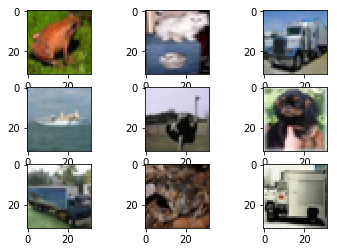

In [28]:
plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])

In [29]:
model.fit_generator(datagen, epochs=3)

Epoch 1/3
196/196 [==============================] - 5s 24ms/step - loss: 1.8815 - accuracy: 0.3274
Epoch 2/3
196/196 [==============================] - 4s 22ms/step - loss: 1.6617 - accuracy: 0.4083
Epoch 3/3
196/196 [==============================] - 5s 23ms/step - loss: 1.5745 - accuracy: 0.4413


## Tensorflow Dataset

In [30]:
ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [31]:
def rescale(x, y):
    return tf.cast(x, tf.float32)/255., y

In [32]:
ds = ds.map(rescale)
ds = ds.shuffle(buffer_size=len(X_train)*2)
ds = ds.repeat()
ds = ds.batch(256)

In [33]:
for example in ds.take(1):
    pass
example

(<tf.Tensor: id=16324, shape=(256, 32, 32, 3), dtype=float32, numpy=
 array([[[[0.70980394, 0.6745098 , 0.54901963],
          [0.6901961 , 0.654902  , 0.5294118 ],
          [0.67058825, 0.63529414, 0.50980395],
          ...,
          [0.5764706 , 0.52156866, 0.41568628],
          [0.5882353 , 0.53333336, 0.42745098],
          [0.5882353 , 0.53333336, 0.43529412]],
 
         [[0.6901961 , 0.654902  , 0.5372549 ],
          [0.6745098 , 0.6392157 , 0.5254902 ],
          [0.6313726 , 0.59607846, 0.47843137],
          ...,
          [0.5882353 , 0.53333336, 0.42745098],
          [0.6039216 , 0.54901963, 0.44313726],
          [0.6       , 0.54509807, 0.44705883]],
 
         [[0.654902  , 0.6156863 , 0.50980395],
          [0.627451  , 0.5921569 , 0.4862745 ],
          [0.6313726 , 0.5921569 , 0.4862745 ],
          ...,
          [0.5803922 , 0.5254902 , 0.41960785],
          [0.5882353 , 0.53333336, 0.42745098],
          [0.6       , 0.5411765 , 0.44313726]],
 
         ...,

In [34]:
model.fit(ds,
          steps_per_epoch=len(X_train)/batch_size,
          epochs=3)

Epoch 1/3
196/195 [==============================] - 10s 53ms/step - loss: 1.5167 - accuracy: 0.4631
Epoch 2/3
196/195 [==============================] - 6s 33ms/step - loss: 1.4695 - accuracy: 0.4803
Epoch 3/3
196/195 [==============================] - 7s 35ms/step - loss: 1.4265 - accuracy: 0.4942


## Exercises

The power of TF Dataset is really apparent when we deal with a very large dataset formed of multiple files on disk or when complex pre-processing functions are needed.

Take a look at the documentation [here](https://www.tensorflow.org/alpha/tutorials/load_data/text) and reproduce one of the examples.

In [49]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow==2.0.0-alpha0



You are using pip version 18.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [50]:
import tensorflow as tf

import tensorflow_datasets as tfds
import os

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [39]:
DIRECTORY_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
FILE_NAMES = ['cowper.txt', 'derby.txt', 'butler.txt']

for name in FILE_NAMES:
  text_dir = tf.keras.utils.get_file(name, origin=DIRECTORY_URL+name)
  
parent_dir = os.path.dirname(text_dir)

parent_dir

'/Users/skumar/.keras/datasets'

In [40]:
def labeler(example, index):
  return example, tf.cast(index, tf.int64)  

labeled_data_sets = []

for i, file_name in enumerate(FILE_NAMES):
  lines_dataset = tf.data.TextLineDataset(os.path.join(parent_dir, file_name))
  labeled_dataset = lines_dataset.map(lambda ex: labeler(ex, i))
  labeled_data_sets.append(labeled_dataset)

In [41]:
BUFFER_SIZE = 50000
BATCH_SIZE = 64
TAKE_SIZE = 5000

In [42]:
all_labeled_data = labeled_data_sets[0]
for labeled_dataset in labeled_data_sets[1:]:
  all_labeled_data = all_labeled_data.concatenate(labeled_dataset)
  
all_labeled_data = all_labeled_data.shuffle(
    BUFFER_SIZE, reshuffle_each_iteration=False)

In [43]:
for ex in all_labeled_data.take(5):
  print(ex)

(<tf.Tensor: id=21678, shape=(), dtype=string, numpy=b'lived near him, owners of a fertile country.'>, <tf.Tensor: id=21679, shape=(), dtype=int64, numpy=2>)
(<tf.Tensor: id=21682, shape=(), dtype=string, numpy=b'still when he has had his fill they at last drive him from the'>, <tf.Tensor: id=21683, shape=(), dtype=int64, numpy=2>)
(<tf.Tensor: id=21686, shape=(), dtype=string, numpy=b'Receives the inserted brass, the quivering beam'>, <tf.Tensor: id=21687, shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: id=21690, shape=(), dtype=string, numpy=b'Though others drink their share, yet by thy side'>, <tf.Tensor: id=21691, shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: id=21694, shape=(), dtype=string, numpy=b"Charg'd with the glitt'ring arms by Vulcan wrought.">, <tf.Tensor: id=21695, shape=(), dtype=int64, numpy=1>)


In [45]:

tokenizer = tfds.features.text.Tokenizer()

vocabulary_set = set()
for text_tensor, _ in all_labeled_data:
  some_tokens = tokenizer.tokenize(text_tensor.numpy())
  vocabulary_set.update(some_tokens)

vocab_size = len(vocabulary_set)
vocab_size

ModuleNotFoundError: No module named 'tensorflow_datasets'